# Network properties

In this notebook you will learn how to use the NetworkX library to analyze basic properties of networks.

## Degrees

The most basic property of a network is the number of connections nodes have, the *degree* of a node. In this notebook we will show how to compute different properties associated to degrees. To illustrate this we first generate a *star graph* where one central is connected to $4$ other nodes.

In [1]:
import networkx as nx

In [3]:
star_graph = nx.Graph()

star_graph.add_edge(1,2)
star_graph.add_edge(1,3)
star_graph.add_edge(1,4)
star_graph.add_edge(1,5)

The degree of a node can be accessed by using the `degree` function of a graph. To get the degree of a node with label $i$ we simply use `degree[i]`. Below we will show this for the star graph by retreiving the degree of node $1$ (the central node) and one of its neighbors.

In [4]:
degree_of_node_1 = star_graph.degree[1]

print(f"Node 1 is the center node and has degree {degree_of_node_1}")

### All other nodes have the same degree
degree_of_other_nodes = star_graph.degree[2]

print(f"The other nodes are leaves and have degree {degree_of_other_nodes}")

Node 1 is the center node and has degree 4
The other nodes are leaves and have degree 1


We can also directly access all degrees in the graph using the `degree` function. By calling `degree()` we obtain a list whose elements are `(node, degree)`. We can then use this list to compute all relevant properies related to degrees. 

In [5]:
### Here is the list of (node, degree) pairs
print(star_graph.degree())

[(1, 4), (2, 1), (3, 1), (4, 1), (5, 1)]


How to iterate over the `.degree()` object 

In [6]:
### We now loop through this list an report the degree of each node
for (node,degree) in star_graph.degree():
    print(f"Node {node} has degree {degree}")

Node 1 has degree 4
Node 2 has degree 1
Node 3 has degree 1
Node 4 has degree 1
Node 5 has degree 1


By creating a list of all the second values of items in `degree()` we get the sequence of all degrees, which is called the *degree sequence*.

In [7]:
degree_sequence = [degree for node, degree in star_graph.degree()]
print(f"The degree sequence of the network is: {degree_sequence}")

The degree sequence of the network is: [4, 1, 1, 1, 1]


From the degree sequence we can compute the average degree. Below we show two ways of doing this. The first is the naive method which uses the `number_of_nodes` function from NetworkX to get the number of nodes in the graph. the second one using build-in functions of Python

In [8]:
average_degree = 0

### Using the num_nodes functions from Network
n = nx.number_of_nodes(star_graph)

for degree in degree_sequence:
    average_degree += degree/n
    
print(f"The average degree of the graph is {average_degree}")

The average degree of the graph is 1.5999999999999999


In [9]:
average_degree_alt = sum(degree_sequence)/len(degree_sequence)
print(f"The average degree of the graph is still {average_degree_alt}")

The average degree of the graph is still 1.6


**Degree Distribution**

Another thing we can compute from the degree sequence is the empirical degree distribution $p_n(k)$ and plot. We will show how this works for the start graph using functions from the Python libraries *numpy* and *matplotlib*.

In [10]:
degree_sequence

[4, 1, 1, 1, 1]

In [11]:
import numpy as np
import matplotlib.pyplot as plt

### First we retreive the total number of nodes in the graph
n = nx.number_of_nodes(star_graph)

### Next we compute the maximum degree and create a list for the degree density 
### whose length is equal to the maximum degree
max_degree = max(degree_sequence)
degree_density = [0]*max_degree

In [12]:
max_degree

4

In [13]:
degree_density
# initialize a list of the density of every level of degree
# e.g. degree_density[0] means the percentage of nodes with degree 1.

[0, 0, 0, 0]

In [14]:
### We then loop through the degree values in the degree sequence and for each value
### we encounter we increase the corresponding value of degree_density by 1/n
for degree in degree_sequence:
    degree_density[degree-1] += 1/n

### To see the result we output this degree density list
print(f"The degree density list of the network is: {degree_density}")

The degree density list of the network is: [0.8, 0, 0, 0.2]


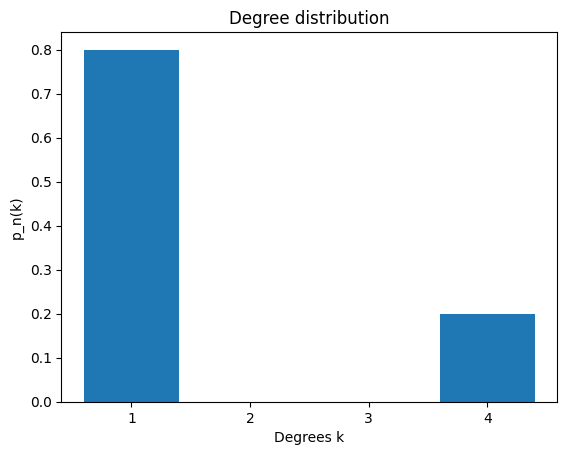

In [15]:
### Now we plot the degree density. For this we first need to construct the values for the x-axis.
### For this we first create a list [0,...,maximum degree - 1, maximum degree] using the arrange function from numpy
### and then select the sublist [1, ..., maximum degree]
x = np.arange(max_degree+1)
x = x[1:len(x)]

### We use a bar plot from the mathplotlib for plotting the degree distribution
plt.bar(x,degree_density)

### We use the xticks function to set the values of the x-axis equal to the integers
### corresponding to the degrees [1, ..., maximum degree]
plt.xticks(x)

### For completeness we add a title and labels for the x- and y-axis
plt.title('Degree distribution')
plt.xlabel('Degrees k')
plt.ylabel('p_n(k)')

plt.show()

## Paths and components

Next to degrees, another important property of networks has to do with paths. For example, we could be interested in the distance (lenght of the shortest path) between two nodes. Or on a higher level, whether all nodes are connected to each other via a path. The NetworkX provides a wide range of functions for this. Here we will show how to find nodes a give distance from a specific nodes as well as computing the average distance and the connected component to which a node belongs.

To illustrate the path functions of NetworkX we will use a cycle graph on 7 nodes.

*Recall that nodes labels start at $0$ by default.*

In [19]:
C = nx.cycle_graph(7)

In [21]:
C.edges

EdgeView([(0, 1), (0, 6), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6)])

**Shortest Path between two given nodes**

If we want to compute the distance between two given nodes we can use the `shortest_path_length` function. Below we show how to compute the distance between node 0 and 5. This shoud be $3$ because the path $0-6-5-4$ is shorter than $0-1-2-3-4$.

In [22]:
distance_0_to_4 = nx.shortest_path_length(C, source=0, target=4)

print(f"The distance from 0 to 4 is {distance_0_to_4}")

The distance from 0 to 4 is 3


**Shortest Path from all nodes to a given node**

Instead of looking only at the distance between two given nodes, we can also compute the distances from all nodes to a given node. For this we can again use the `shortest_path_length` function but this time we simply omit the `target` node.

Below we list the distance of all nodes to node 0.

**NOTE:** The list of distances will only contain those nodes that are connected to the source node

In [23]:
list_of_distances = nx.shortest_path_length(C, source=0)

for item in list_of_distances:
    print(f"The distance between node 0 and node {item} is {list_of_distances[item]}")

The distance between node 0 and node 0 is 0
The distance between node 0 and node 1 is 1
The distance between node 0 and node 6 is 1
The distance between node 0 and node 2 is 2
The distance between node 0 and node 5 is 2
The distance between node 0 and node 3 is 3
The distance between node 0 and node 4 is 3


In [25]:
[i for i in list_of_distances]

[0, 1, 6, 2, 5, 3, 4]

**Distance Matrix**

If we also do not specify the `source` in the `shortest_path_length` function, we get the entire distance matrix. We show this below for the cycle graph and list all distances. 

**Note:** To be able to access the distance matrix it efficiently, it is helpful to cast it to a dictionary object using the Python `dict` function.

In [28]:
### The outcome of the shortest_path_lenght function is cast to a dictionary.
distance_matrix = dict(nx.shortest_path_length(C))
distance_matrix

{0: {0: 0, 1: 1, 6: 1, 2: 2, 5: 2, 3: 3, 4: 3},
 1: {1: 0, 0: 1, 2: 1, 3: 2, 6: 2, 4: 3, 5: 3},
 2: {2: 0, 1: 1, 3: 1, 0: 2, 4: 2, 5: 3, 6: 3},
 3: {3: 0, 2: 1, 4: 1, 1: 2, 5: 2, 0: 3, 6: 3},
 4: {4: 0, 3: 1, 5: 1, 2: 2, 6: 2, 0: 3, 1: 3},
 5: {5: 0, 4: 1, 6: 1, 0: 2, 3: 2, 1: 3, 2: 3},
 6: {6: 0, 0: 1, 5: 1, 1: 2, 4: 2, 2: 3, 3: 3}}

In [27]:
### We can now access the distance from node i to j by calling distance_matrix[i][j]

### Let us list all entries in the matrix
for source in distance_matrix:
    for target in distance_matrix[source]:
        print(f"Distance from {source} to {target} is {distance_matrix[source][target]}")

Distance from 0 to 0 is 0
Distance from 0 to 1 is 1
Distance from 0 to 6 is 1
Distance from 0 to 2 is 2
Distance from 0 to 5 is 2
Distance from 0 to 3 is 3
Distance from 0 to 4 is 3
Distance from 1 to 1 is 0
Distance from 1 to 0 is 1
Distance from 1 to 2 is 1
Distance from 1 to 3 is 2
Distance from 1 to 6 is 2
Distance from 1 to 4 is 3
Distance from 1 to 5 is 3
Distance from 2 to 2 is 0
Distance from 2 to 1 is 1
Distance from 2 to 3 is 1
Distance from 2 to 0 is 2
Distance from 2 to 4 is 2
Distance from 2 to 5 is 3
Distance from 2 to 6 is 3
Distance from 3 to 3 is 0
Distance from 3 to 2 is 1
Distance from 3 to 4 is 1
Distance from 3 to 1 is 2
Distance from 3 to 5 is 2
Distance from 3 to 0 is 3
Distance from 3 to 6 is 3
Distance from 4 to 4 is 0
Distance from 4 to 3 is 1
Distance from 4 to 5 is 1
Distance from 4 to 2 is 2
Distance from 4 to 6 is 2
Distance from 4 to 0 is 3
Distance from 4 to 1 is 3
Distance from 5 to 5 is 0
Distance from 5 to 4 is 1
Distance from 5 to 6 is 1
Distance fro

**Average Dist in the graph**

Using the distance matrix we can compute the average distance in the graph. However, NetworkX also has a direct function for this `average_shortest_path_length`.

In [29]:
average_distance = nx.average_shortest_path_length(C)

print(f"The average path length of the graph is {average_distance}")

The average path length of the graph is 2.0


In addition to paths, NetworkX also has functions for finding the connected components of the graph. To illustrate these functions we should use a graph that has at least two components. For this we again create a cycle graph on 7 nodes and then add a disjoint cycle on 3 nodes.  

In [33]:
### We first create a new cycle graph on 7 nodes
D = nx.cycle_graph(7)

### Then we add the disjoint triangle
D.add_edge(7,8)
D.add_edge(7,9)
D.add_edge(8,9)

(7,8,9) is not connected with (0-6)

We can now use the `is_connected` function to test if the graph is connected.

In [34]:
is_connected = nx.is_connected(D)

print(f"Is the graph connected: {is_connected}")

Is the graph connected: False


**Number of connected components**

We can also find the number of components of the graph using `number_connected_components`.

In [35]:
N_of_components = nx.number_connected_components(D)

print(f"The graph has {N_of_components} components")

The graph has 2 components


Finally, we can find all nodes in the component to which a specific node belongs using `node_connected_component`. To illustrate this we will list all nodes in the component of node 7.

In [36]:
component_7 = nx.node_connected_component(D,7)

for node in component_7:
    print(f"Node {node} belongs to the component of node 7")

Node 8 belongs to the component of node 7
Node 9 belongs to the component of node 7
Node 7 belongs to the component of node 7


## Triangles and clustering

The final property we cover in the notebook is clustering. The NetworkX library has several functions to analyze triangles in a network and compute the clustering coefficient of each nodes and the average over the whole graph. To illustrate this we create a very simple graph consisting of one triangle.

In [38]:
triangle_graph = nx.Graph()

triangle_graph.add_edge(1,2)
triangle_graph.add_edge(2,3)
triangle_graph.add_edge(3,1)

In [40]:
triangle_graph.is_directed()

False

**return num_of_triangles of a node.**

With the `triangles` function we can obtain a full dictionary that lists for each node how many triangles it is part of.

returns a dict of `{node_i: num_triangles_it_is_part_of}`

In [42]:
triangle_per_node = nx.triangles(triangle_graph)

### The output is a dictionary object
print(f"The full output is {triangle_per_node}")

### We can use this to loop through all nodes and check the number of triangles
for node in triangle_per_node:
    print(f"Node {node} is part of {triangle_per_node[node]} triangle(s)")

The full output is {1: 1, 2: 1, 3: 1}
Node 1 is part of 1 triangle(s)
Node 2 is part of 1 triangle(s)
Node 3 is part of 1 triangle(s)


If we are only interested in a single node we can simply add its label as the second parameter.

In [41]:
triangles_node_2 = nx.triangles(triangle_graph,2)

print(f"Node 2 is part of {triangles_node_2} triangle(s)")

Node 2 is part of 1 triangle(s)


We can now combine the result from the `triangles` function with the degrees to compute the average clustering coefficient of each node and hence of the entire graph. However, NetworkX has a function `clustering` that does this for us. It works in a similar way as the `traingles` function.

In [44]:
clustering_per_node = nx.clustering(triangle_graph)

for node in clustering_per_node:
    print(f"The clustering coefficient of node {node} is {clustering_per_node[node]}")

### If we only want the clustering of a specific node we specify its label.
clustering_node_2 = nx.clustering(triangle_graph,2)
print(f"Node 2 has clustering coefficient {clustering_node_2}")

The clustering coefficient of node 1 is 1.0
The clustering coefficient of node 2 is 1.0
The clustering coefficient of node 3 is 1.0
Node 2 has clustering coefficient 1.0


To compute the average clustering coefficient of the graph we use `average_clustering`.

In [45]:
cc = nx.average_clustering(triangle_graph)
print(f"The average clustering coefficient of the graph is {cc}")

The average clustering coefficient of the graph is 1.0


## Exercises

**Exercise 1**
Another way to look at the degrees is to consider the *cummulative distribution function*. This is defined for the degrees as follows: 

$F_n(k) = \frac{1}{n} \sum_{i = 1}^n 1[d_i \le k]$. 

Use the method below to create a network, then compute the cummulative distribution function of the degrees and plot it.

**Note:** You can use `cumfreq` from the `scipy.stats` library to compute the empirical cdfs. See https://docs.scipy.org/doc/scipy-1.10.1/reference/generated/scipy.stats.cumfreq.html for more info.

In [16]:
### Generate a graph with 100 nodes
G1 = nx.erdos_renyi_graph(100,0.3)

In [17]:
### Solution

from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# produce degree sequence
G1_degree_sequence = [degree for node, degree in G1.degree()]

# max degree
G1_max_degree = max(G1_degree_sequence)

In [59]:
res = stats.cumfreq(G1_degree_sequence, numbins=G1_max_degree, )
res.cumcount

array([  2.,   2.,   3.,   3.,   4.,   7.,   7.,   9.,   9.,  13.,  13.,
        19.,  26.,  26.,  32.,  32.,  36.,  36.,  44.,  44.,  53.,  60.,
        60.,  74.,  74.,  82.,  82.,  87.,  90.,  90.,  94.,  94.,  95.,
        95.,  96.,  98.,  98.,  98.,  98., 100.])

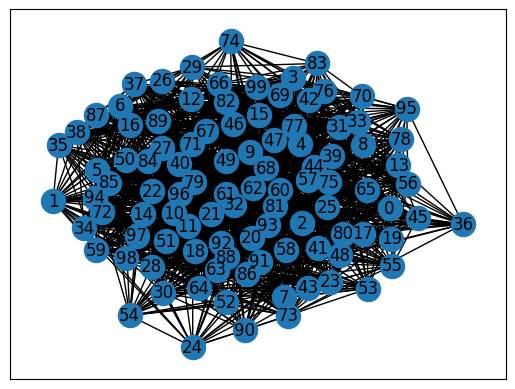

In [18]:
nx.draw_networkx(G1)

In [62]:
res.binsize

0.5641025641025657

In [67]:
x = res.lowerlimit + np.linspace(0, res.binsize*res.cumcount.size, res.cumcount.size)
x # x: a sequence of bins

array([17.71794872, 18.29651545, 18.87508218, 19.45364892, 20.03221565,
       20.61078238, 21.18934911, 21.76791584, 22.34648258, 22.92504931,
       23.50361604, 24.08218277, 24.66074951, 25.23931624, 25.81788297,
       26.3964497 , 26.97501644, 27.55358317, 28.1321499 , 28.71071663,
       29.28928337, 29.8678501 , 30.44641683, 31.02498356, 31.6035503 ,
       32.18211703, 32.76068376, 33.33925049, 33.91781723, 34.49638396,
       35.07495069, 35.65351742, 36.23208416, 36.81065089, 37.38921762,
       37.96778435, 38.54635108, 39.12491782, 39.70348455, 40.28205128])

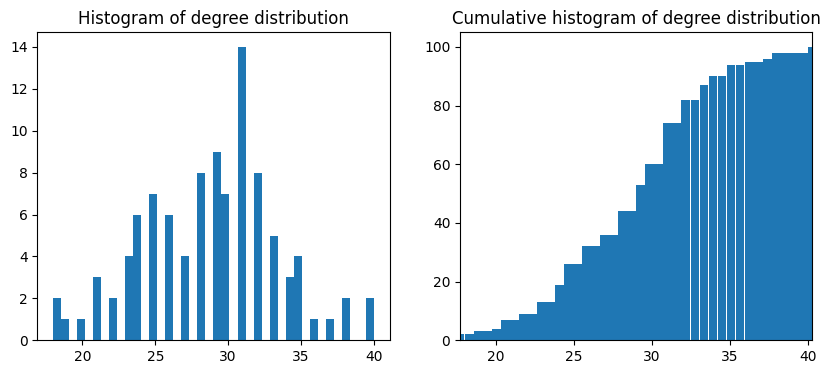

In [69]:
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.hist(G1_degree_sequence, bins=G1_max_degree)
ax1.set_title('Histogram of degree distribution')
ax2.bar(x, res.cumcount, width=res.binsize)
ax2.set_title('Cumulative histogram of degree distribution')
ax2.set_xlim([x.min(), x.max()])

plt.show()

**Exercise 2**

Use the code below to generate a graph. Then find a node with $d_i > 0$ and list all nodes that are at distance 3 from that node.

In [80]:
### Generate a graph with 100 nodes
G2 = nx.erdos_renyi_graph(100,0.02)

In [91]:
### Solution

# find nodes with degree > 0
nodes_positive_degree = []

for node, degree in G2.degree():
    if degree > 0:
        nodes_positive_degree.append(node) 



In [102]:
import random

picked_node = random.choice(nodes_positive_degree)
distance_3_nodes  =  [node for node, distance in nx.shortest_path_length(G2, picked_node).items() 
                           if distance == 3]

distance_3_nodes


[45, 52, 56, 26]

**Exercise 3** Check if the graph is connected. If not, list how many components it has and compute the size of the largest and smallest component. For this last part the function `connected_components` could be helpful.

In [104]:
### Solution

nx.is_connected(G2)

False

In [105]:
nx.number_connected_components(G2)

23

In [109]:
size_of_components = [len(i) for i in list(nx.connected_components(G2))]
max_size = max(size_of_components)
min_size = min(size_of_components)
max_size, min_size

(67, 1)

**Exercise 4** Use the graph from the previous exercise and find the node with the highest clustering coefficient.

In [124]:
### Solution

clustering_dict = nx.clustering(G1)

max(clustering_dict, key=clustering_dict.get)

37

**Exercise 5** Another way of looking at the clustering of the graph is via the *global clustering coefficient*. This is defined as 
$$C(G) = \frac{3\Delta(G)}{\wedge(G)},$$
where $\Delta(G)$ is the total number of triangles in $G$ and $\wedge(G)$ is the total number of wegdes (paths of lenght $2$) in $G$.

Compute the global clustering coefficient of the graph from the previous exercise and compare it to the average clustering coefficient.

In [126]:
### Solution

# average clustering coefficient

average_cc = nx.average_clustering(G1)
average_cc

0.29018582126938985

In [129]:
# number of triangles is the sum of triangle / 3 ???

triangle_list = nx.triangles(G1)

num_of_triangle = sum([triangle_list[node] for node in triangle_list]) / 3

In [139]:
# def find_wedges(G: nx.Graph):



(0, {0: 0, 2: 1, 3: 1, 7: 1, 14: 1, 16: 1, 19: 1, 20: 1, 21: 1, 25: 1, 29: 1, 30: 1, 33: 1, 35: 1, 38: 1, 40: 1, 46: 1, 50: 1, 51: 1, 56: 1, 58: 1, 62: 1, 63: 1, 64: 1, 70: 1, 73: 1, 80: 1, 81: 1, 84: 1, 91: 1, 98: 1, 99: 1, 1: 2, 4: 2, 5: 2, 6: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 15: 2, 17: 2, 18: 2, 22: 2, 23: 2, 24: 2, 26: 2, 27: 2, 28: 2, 31: 2, 32: 2, 34: 2, 36: 2, 37: 2, 39: 2, 41: 2, 42: 2, 43: 2, 44: 2, 45: 2, 47: 2, 48: 2, 49: 2, 52: 2, 53: 2, 54: 2, 55: 2, 57: 2, 59: 2, 60: 2, 61: 2, 65: 2, 66: 2, 67: 2, 68: 2, 69: 2, 71: 2, 72: 2, 74: 2, 75: 2, 76: 2, 77: 2, 78: 2, 79: 2, 82: 2, 83: 2, 85: 2, 86: 2, 87: 2, 88: 2, 89: 2, 90: 2, 92: 2, 93: 2, 94: 2, 95: 2, 96: 2, 97: 2})
(1, {1: 0, 3: 1, 6: 1, 9: 1, 11: 1, 13: 1, 14: 1, 25: 1, 28: 1, 29: 1, 31: 1, 33: 1, 34: 1, 38: 1, 41: 1, 43: 1, 45: 1, 46: 1, 47: 1, 53: 1, 59: 1, 62: 1, 63: 1, 65: 1, 71: 1, 76: 1, 83: 1, 84: 1, 85: 1, 86: 1, 89: 1, 92: 1, 94: 1, 97: 1, 0: 2, 2: 2, 4: 2, 5: 2, 7: 2, 8: 2, 10: 2, 12: 2, 15: 2, 16: 2, 1